<a href="https://colab.research.google.com/github/pranay8297/Stable-Diffusion-Experiments/blob/main/Clustering_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
!pip install ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00


In [3]:
from ipdb import set_trace as st

# EinSum Experiments


In [2]:
a, b = torch.randn((2, 3)), torch.randn((3, 4))
c = a@b
c.shape

torch.Size([2, 4])

In [3]:
d = torch.einsum('ij,jk->ijk', a, b)

In [4]:
d.shape

torch.Size([2, 3, 4])

In [9]:
a, b = torch.randn((3)), torch.randn((3))
c = torch.einsum('i,i->', a, b)

In [10]:
c

tensor(-0.8417)

In [11]:
a@b

tensor(-0.8417)

In [16]:
torch.einsum('i,j->ij', a, b)

tensor([[-0.3864,  0.4579,  0.8651],
        [-0.3129,  0.3709,  0.7006],
        [ 0.3690, -0.4374, -0.8262]])

In [13]:
a, b

(tensor([-0.5859, -0.4745,  0.5596]), tensor([ 0.6595, -0.7816, -1.4766]))

In [17]:
a = torch.randn((4, 3))
torch.einsum('ij->ji', a)

tensor([[ 0.6962,  1.2020, -0.6768, -0.1171],
        [-1.4245,  0.4091, -0.4582,  0.9390],
        [-1.1398, -1.1627, -0.2345,  2.4431]])

In [18]:
a = torch.randn((3, 3))
torch.einsum('ij->i', a)

tensor([-0.0904,  0.6422,  0.1621])

In [19]:
a

tensor([[-0.1186, -1.1908,  1.2190],
        [ 1.3226, -0.3222, -0.3581],
        [ 0.4255, -0.5418,  0.2784]])

In [20]:
a = torch.randn((3, 3))
torch.einsum('ij->', a)

tensor(-0.2345)

In [26]:
a = torch.randn((3, 4))
b = torch.randn((5, 4))
c = torch.einsum('ij,kj->ik', a, b)

In [28]:
c.shape

torch.Size([3, 5])

In [27]:
c

tensor([[-0.7606, -0.4931, -0.0574, -2.5396,  0.6466],
        [ 0.4655, -1.8726,  2.8178,  4.0108,  0.4942],
        [-0.8272,  0.0447, -2.2813, -1.6850,  1.4388]])

In [32]:
(a@b.T) == c

tensor([[ True, False,  True, False,  True],
        [ True,  True,  True, False,  True],
        [False, False, False,  True,  True]])

In [33]:
c / (a@b.T)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])

# Clustering Problem!

In [ ]:
# step - 1: Generate data and plot that data

# Repeat for some iterations:
# Step - 2: Calculate inter point distance
# step - 3: Take weighted average of those distances and thats the new point.

In [4]:
import math, matplotlib.pyplot as plt, operator
from functools import partial

In [5]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [6]:
torch.manual_seed(42)

In [7]:
n_clusters=6
n_samples =250
centroids = torch.rand(n_clusters, 2)*70-35

In [8]:
centroids

tensor([[ 26.7589,  29.0503],
        [ -8.1995,  32.1514],
        [ -7.6686,   7.0627],
        [-17.0399,  20.5549],
        [ 30.8540, -25.6770],
        [ 30.4219,   6.5506]])

In [9]:
torch.diag(tensor([5.,5.]))

tensor([[5., 0.],
        [0., 5.]])

In [10]:
def sample(m):
  return MultivariateNormal(m, torch.diag(tensor([5.,5.]))).sample((n_samples,))

slices = [sample(c) for c in centroids]
data = torch.cat(slices, dim = 0)
data.shape

torch.Size([1500, 2])

In [13]:
centroids, data

(tensor([[ 26.7589,  29.0503],
         [ -8.1995,  32.1514],
         [ -7.6686,   7.0627],
         [-17.0399,  20.5549],
         [ 30.8540, -25.6770],
         [ 30.4219,   6.5506]]),
 tensor([[26.2037, 26.3486],
         [25.6908, 30.2133],
         [30.4312, 28.6934],
         ...,
         [30.7720,  9.3234],
         [29.3543,  3.9597],
         [31.1677,  5.3088]]))

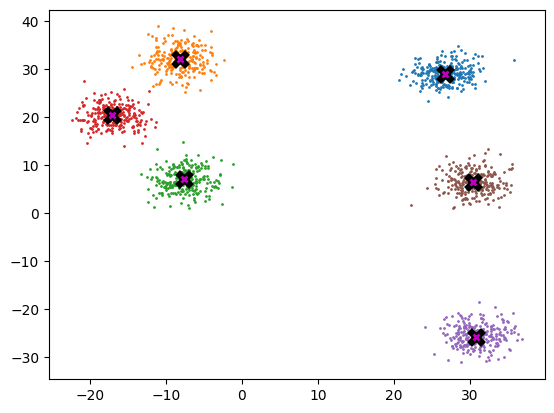

In [11]:
def plot_data(centroids, data, n_samples, ax=None, plot_centroids = True):

    if ax is None:
        _,ax = plt.subplots()

    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)

        if plot_centroids:
            ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
            ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

plot_data(centroids, data, 250)

In [12]:
def gaussian(x, sigma = 2.5):

  '''
  Returns corrosponding value of x based on gaussian normal distribution.

  Args:
    x: torch.Tensor or torch.tensor
    sigma: float

  Returns:
    torch.Tensor or torch.tensor

  '''
  return (1/sigma*math.sqrt(2*math.pi))*torch.exp(-0.5*(x/sigma)**2)

In [21]:
gaussian(tensor(1.4))

tensor(0.8571)

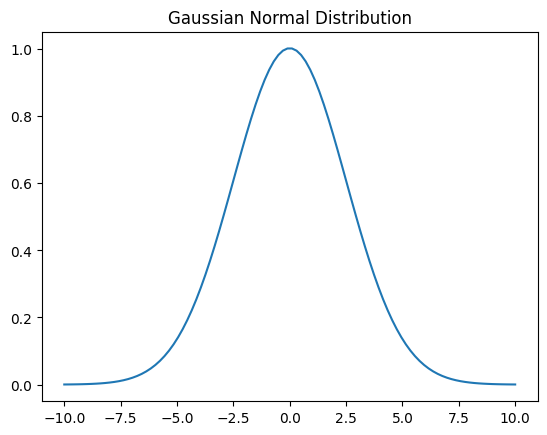

In [13]:
def plot_func(f):
    x = torch.linspace(-10,10,100)
    plt.plot(x, f(x))
    plt.title('Gaussian Normal Distribution')
plot_func(gaussian)

In [25]:
X = data.clone()
x = X[0]

In [27]:
x.shape, X.shape, x[None].shape

(torch.Size([2]), torch.Size([1500, 2]), torch.Size([1, 2]))

In [28]:
# calculate the differences
diff = x - X

# square the differences and sum them and square root
distance = torch.sqrt((diff**2).sum(1))

In [30]:
distance[:10], distance[-10:],

(tensor([0.0000, 3.8986, 4.8342, 3.7265, 6.2729, 4.1222, 6.5598, 6.0017, 3.4882,
         5.1295]),
 tensor([22.2515, 19.7583, 22.1499, 22.8804, 17.3239, 16.6871, 23.6415, 17.6275,
         22.6095, 21.6175]))

In [32]:
# Calcuate weights
weights = gaussian(distance)

In [33]:
weights

tensor([1.0027e+00, 2.9722e-01, 1.5460e-01,  ..., 1.6044e-11, 1.7399e-18,
        5.8201e-17])

In [38]:
weights.shape, X.shape, weights[None, :].shape, weights[:, None].shape

(torch.Size([1500]),
 torch.Size([1500, 2]),
 torch.Size([1, 1500]),
 torch.Size([1500, 1]))

In [43]:
n = (weights[:, None]*X).sum(0)/weights.sum()

In [45]:
x, n

(tensor([26.2037, 26.3486]), tensor([26.4402, 28.0381]))

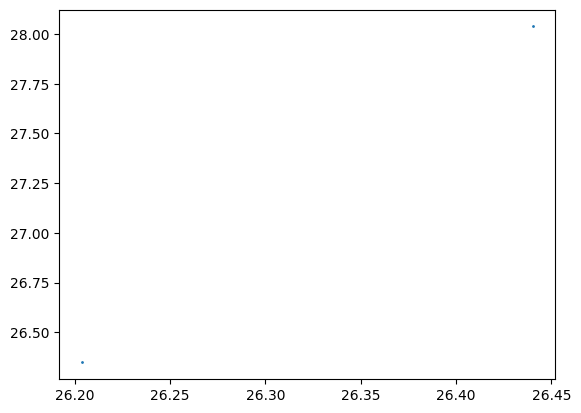

In [44]:
plt.scatter([n[0], x[0]], [n[1], x[1]], s=1)

In [47]:
def one_update(X, bandwidth = 2.5):

  for i, x in enumerate(X):
    # calculate distance
    distance = ((x - X)**2).sum(1).sqrt()
    weights = gaussian(distance, sigma = bandwidth)
    weighted_avg = (X*weights[:, None]).sum(0)/weights.sum()
    X[i] = weighted_avg

In [48]:
X = data.clone()
one_update(X)

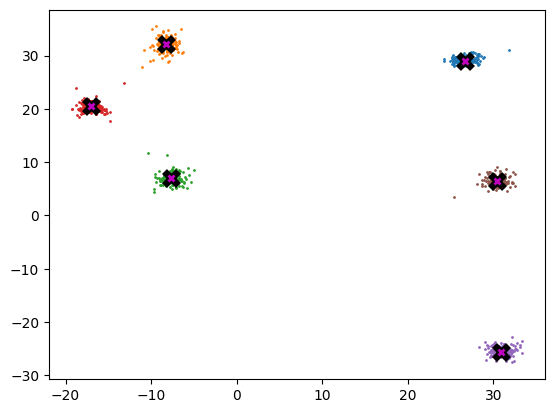

In [49]:
plot_data(centroids, X, 250)

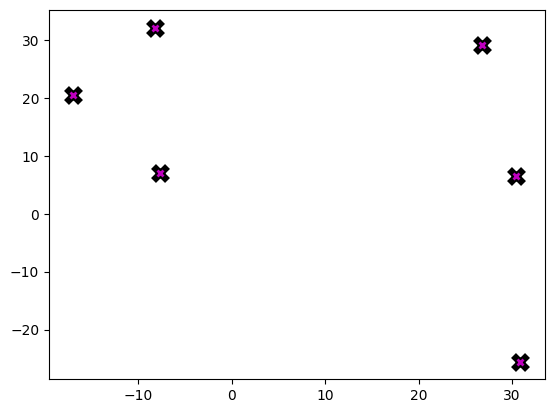

In [50]:
one_update(X)
plot_data(centroids, X, 250)

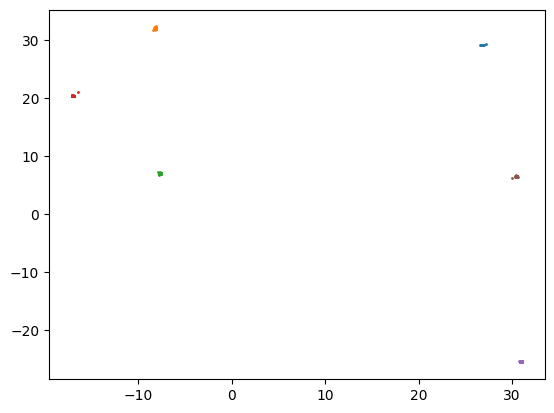

In [52]:
plot_data(centroids, X, 250, plot_centroids=False)

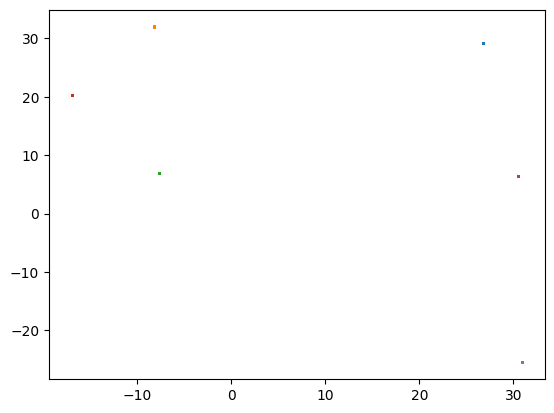

In [53]:
one_update(X)
plot_data(centroids, X, 250, plot_centroids=False)

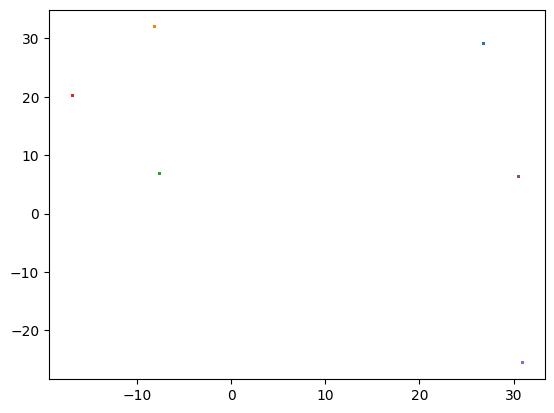

In [54]:
one_update(X)
plot_data(centroids, X, 250, plot_centroids=False)

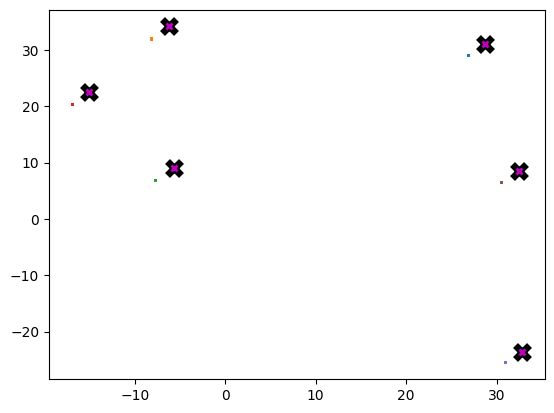

In [56]:
plot_data(centroids + 2, X, 250, plot_centroids=True)

In [60]:
def mean_shift(data, bandwidth = 2.5):
  X = data.clone()
  for i in range(5):
    one_update(X)
  return X

In [61]:
data.shape

torch.Size([1500, 2])

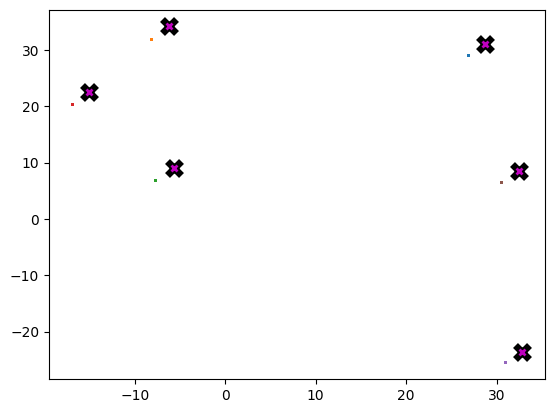

In [62]:
nd = mean_shift(data)
plot_data(centroids + 2, nd, 250, plot_centroids=True)

# Animation

In [63]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [64]:
?? FuncAnimation

In [66]:
fig, ax = plt.subplots()
def do_one(frame):
  if frame: one_update(X)
  ax.clear()
  plot_data(centroids+2, X, n_samples = 250, ax = ax)

X = data.clone()
ani = FuncAnimation(fig, do_one, frames = 5, interval = 1000, repeat = False)
plt.close()
HTML(ani.to_jshtml())

# Using CUDA

In [67]:
# Lets do batches

In [14]:
X = data.clone()

In [15]:
X.shape

torch.Size([1500, 2])

In [22]:
x = X[:5]
x.shape

torch.Size([5, 2])

In [23]:
#calculate differences
# (a[None]-b[:,None])
X[None].shape, x[:, None].shape

(torch.Size([1, 1500, 2]), torch.Size([5, 1, 2]))

In [24]:
diff = X[None, :] - x[:, None, :]

In [26]:
distance = (diff**2).sum(-1)

In [27]:
distance.shape

torch.Size([5, 1500])

In [17]:
# Get Distances
def get_distance_batch(a, b):
  '''
  a - (n*2)
  b - (m*2)

  return - (m*n*1)
  '''

  diff = b[:, None, :] - a[None, :]
  return (diff**2).sum(-1).sqrt()

In [28]:
distances = get_distance_batch(X, x)

In [29]:
distances.shape

torch.Size([5, 1500])

In [30]:
weights = gaussian(distances)

In [31]:
weights.shape, distances.shape

(torch.Size([5, 1500]), torch.Size([5, 1500]))

In [32]:
# Claculate Weighted average
# Multiply weights to the points
# Sum the points and divide by sum of weights

x.shape, weights.shape, X.shape

(torch.Size([5, 2]), torch.Size([5, 1500]), torch.Size([1500, 2]))

In [33]:
weights[:, :, None].shape, X[None, :].shape

(torch.Size([5, 1500, 1]), torch.Size([1, 1500, 2]))

In [34]:
(weights[:, :, None] * X[None, :]).sum(1)/weights.sum(1)[:, None]

tensor([[26.4402, 28.0381],
        [26.2393, 29.5189],
        [28.4839, 29.0447],
        [26.2137, 29.4507],
        [28.8669, 29.6120]], device='cuda:0')

In [36]:
x

tensor([[26.2037, 26.3486],
        [25.6908, 30.2133],
        [30.4312, 28.6934],
        [25.6466, 30.0332],
        [31.2364, 30.0933]], device='cuda:0')

In [35]:
weights.sum(1)[:, None].shape

torch.Size([5, 1])

In [18]:
def one_update_batch(X):
  st()
  x = X.clone()
  distances = get_distance_batch(X, x)
  weights = gaussian(distances)
  new_points = (weights[:, :, None] * X[None, :]).sum(1)/weights.sum(1)[:, None]
  X = new_points

In [20]:
X = data.clone()
X = X.to(torch.device('cuda'))
for i in range(5):
  one_update_batch(X)




PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 336, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-18-a1a819ac90aa>(3)one_update_batch()
      2   st()
----> 3   x = X.clone()
      4   distances = get_distance_batch(X, x)

ipdb> n
> <ipython-input-18-a1a819ac90aa>(4)one_update_batch()
      3   x = X.clone()
----> 4   distances = get_distance_batch(X, x)
      5   weights = gaussian(distances)

ipdb> x.device
device(type='cuda', index=0)
ipdb> n
> <ipython-input-18-a1a819ac90aa>(5)one_update_batch()
      4   distances = get_distance_batch(X, x)
----> 5   weights = gaussian(distances)
      6   new_points = (weights[:, :, None] * X[None, :]).sum(1)/weights.sum(1)[:, None]

ipdb> distances.shape
torch.Size([1500, 1500])
ipdb> n
> <ipython-input-18-a1a819ac90aa>(6)one_update_batch()
      5   weights = gaussian(distances)
----> 6   new_points = (weights[:, :, None] * X[None, :]).sum(1)/weights.sum(1)[:, None]
      7   X = new_points

ipdb> weights.shape
torch.Size([1500, 1500])
ipdb> n
> <ipython-input-18-a1a819ac90aa>(7)one_update_batch()
      5   weights = gaussi


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 347, in set_continue
    sys.settrace(None)



> <ipython-input-18-a1a819ac90aa>(3)one_update_batch()
      2   st()
----> 3   x = X.clone()
      4   distances = get_distance_batch(X, x)

ipdb> c
> <ipython-input-18-a1a819ac90aa>(3)one_update_batch()
      2   st()
----> 3   x = X.clone()
      4   distances = get_distance_batch(X, x)

ipdb> c
> <ipython-input-18-a1a819ac90aa>(3)one_update_batch()
      2   st()
----> 3   x = X.clone()
      4   distances = get_distance_batch(X, x)

ipdb> c
> <ipython-input-18-a1a819ac90aa>(3)one_update_batch()
      2   st()
----> 3   x = X.clone()
      4   distances = get_distance_batch(X, x)

ipdb> c


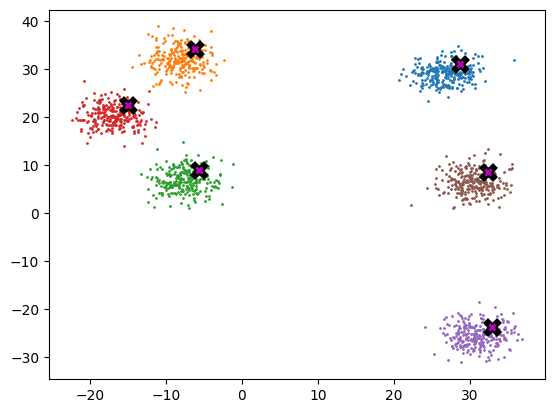

In [21]:
plot_data(centroids + 2, X.to('cpu'), 250, plot_centroids=True)